In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pd.options.display.max_columns = None

In [3]:
df_calib = pd.read_csv('../Data/csv_result-Descriptors_Calibration.csv', index_col='id')

In [4]:
df_calib.shape

(4996, 29)

#### *Our data has 4996 rows and 28 predictor variables plus 1 target variable or label*

In [5]:
df_calib.head()

,IP_ES_25_N1,Z3_IB_4_N1,Z1_IB_10_N1,Z1_IB_5_N1,Z3_IB_8_N1,ECI_IB_4_N1,ECI_IB_5_N1,Gs(U)_IB_12_N1,Gs(U)_IB_68_N1,Gs(U)_IB_58_N1,Gs(U)_IB_60_N1,Z1_NO_sideL35_M,HP_NO_sideL35_CV,Z1_NO_sideR35_CV,Pb_NO_sideR35_S,IP_NO_sideL35_SI71,Z1_NO_PRT_CV,Z2_NO_AHR_CV,Gs(U)_NO_ALR_SI71,Z3_NO_UCR_S,Z3_NO_UCR_N1,ECI_NO_UCR_CV,Pa_NO_BSR_SI71,ISA_NO_NPR_S,Z3_NO_NPR_V,IP_NO_PLR_S,Pb_NO_PCR_V,ECI_NO_PCR_CV,class
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,15.35,13.06,9.08,7.15,18.86,34.99,38.64,0.03,0.05,0.04,0.07,6.34,-3.39,5.25,0.76,0.61,7.81,4.01,0.54,-0.31,-3.41,0.33,0.60,-1.59,0.70,0.33,0.02,0.62,P
2,4.76,17.69,8.92,7.83,16.28,30.32,48.26,0.06,0.04,0.03,0.04,0.68,-2.82,4.50,0.94,0.53,3.29,4.19,0.58,-0.90,-1.73,0.39,0.50,-0.83,0.65,0.27,0.01,0.63,P
3,15.51,21.45,7.83,9.29,17.95,34.48,35.05,0.05,0.05,0.04,0.03,0.70,-1.87,3.78,0.84,0.55,2.64,17.64,0.52,1.40,0.91,0.46,0.48,-0.19,1.54,0.24,0.02,0.58,P
4,7.03,43.15,6.15,10.30,25.39,42.29,31.73,0.04,0.04,0.06,0.09,0.73,-6.12,2.84,1.12,0.54,3.65,-11.68,0.57,-1.10,0.45,0.42,0.43,-1.20,1.39,0.62,0.01,0.46,P
5,4.90,17.59,7.78,11.99,19.38,43.01,56.11,0.04,0.04,0.07,0.04,0.71,-7.13,2.90,1.25,0.54,4.24,3.50,0.55,1.16,5.40,0.47,0.46,-1.01,1.53,0.67,0.02,0.63,P


#### Check for data types

In [6]:
df_calib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4996 entries, 1 to 4996
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IP_ES_25_N1         4996 non-null   float64
 1   Z3_IB_4_N1          4996 non-null   float64
 2   Z1_IB_10_N1         4996 non-null   float64
 3   Z1_IB_5_N1          4996 non-null   float64
 4   Z3_IB_8_N1          4996 non-null   float64
 5   ECI_IB_4_N1         4996 non-null   float64
 6   ECI_IB_5_N1         4996 non-null   float64
 7   Gs(U)_IB_12_N1      4996 non-null   float64
 8   Gs(U)_IB_68_N1      4996 non-null   float64
 9   Gs(U)_IB_58_N1      4996 non-null   float64
 10  Gs(U)_IB_60_N1      4996 non-null   float64
 11  Z1_NO_sideL35_M     4996 non-null   float64
 12  HP_NO_sideL35_CV    4996 non-null   float64
 13  Z1_NO_sideR35_CV    4996 non-null   float64
 14  Pb_NO_sideR35_S     4996 non-null   float64
 15  IP_NO_sideL35_SI71  4996 non-null   float64
 16  Z1_NO_

In [7]:
df_calib.describe()

,IP_ES_25_N1,Z3_IB_4_N1,Z1_IB_10_N1,Z1_IB_5_N1,Z3_IB_8_N1,ECI_IB_4_N1,ECI_IB_5_N1,Gs(U)_IB_12_N1,Gs(U)_IB_68_N1,Gs(U)_IB_58_N1,Gs(U)_IB_60_N1,Z1_NO_sideL35_M,HP_NO_sideL35_CV,Z1_NO_sideR35_CV,Pb_NO_sideR35_S,IP_NO_sideL35_SI71,Z1_NO_PRT_CV,Z2_NO_AHR_CV,Gs(U)_NO_ALR_SI71,Z3_NO_UCR_S,Z3_NO_UCR_N1,ECI_NO_UCR_CV,Pa_NO_BSR_SI71,ISA_NO_NPR_S,Z3_NO_NPR_V,IP_NO_PLR_S,Pb_NO_PCR_V,ECI_NO_PCR_CV
count,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4.996000e+03,4996.000000,4996.000000,4996.000000,4.996000e+03,4.996000e+03,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000,4996.000000
mean,6.024115,30.891944,17.788833,19.162806,30.325268,78.943801,79.024862,0.060528,0.061173,0.061181,0.060859,2.332514,2.573335e+13,5.392062,0.870164,0.549055,1.512328e+13,1.570832e+12,0.499914,-17.575522,0.987970,-9.567438,-11.475354,-0.674313,1.086801,0.467228,-1.985865,-1.443987
std,4.023193,42.815609,49.109902,53.277396,46.245450,106.459850,106.487240,0.033369,0.035605,0.037344,0.034417,16.569290,3.327062e+15,296.429524,0.555785,0.070641,1.068950e+15,1.110302e+14,0.071226,424.071789,200.279743,316.209943,346.359179,0.571548,0.459804,0.304889,141.464031,141.471769
min,-4.290000,6.980000,5.060000,5.030000,6.940000,14.920000,14.780000,0.030000,0.020000,0.020000,0.020000,-345.940000,-1.147296e+17,-10164.530000,-5.830000,0.040000,-2.077636e+04,-4.226710e+03,0.060000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-3.350000,0.090000,-2.720000,-9999.000000,-9999.000000
25%,4.620000,14.620000,7.810000,7.880000,14.500000,31.417500,31.177500,0.040000,0.040000,0.040000,0.040000,0.690000,-7.045000e+00,1.387500,0.630000,0.520000,1.880000e+00,-6.132500e+00,0.480000,-0.780000,0.270000,0.390000,0.490000,-1.010000,0.750000,0.290000,0.010000,0.550000
50%,5.580000,20.340000,9.200000,9.230000,19.930000,43.625000,43.400000,0.050000,0.050000,0.050000,0.050000,1.010000,-3.735000e+00,3.710000,0.840000,0.560000,4.430000e+00,-9.450000e-01,0.510000,1.020000,3.885000,0.430000,0.530000,-0.730000,1.060000,0.480000,0.020000,0.600000
75%,6.450000,28.962500,11.340000,11.412500,28.580000,74.017500,73.732500,0.070000,0.070000,0.070000,0.070000,1.750000,-1.860000e+00,7.662500,1.100000,0.590000,9.272500e+00,5.740000e+00,0.540000,1.400000,8.400000,0.480000,0.580000,-0.430000,1.390000,0.660000,0.020000,0.630000
max,18.220000,333.330000,333.330000,333.330000,1347.150000,1413.540000,1432.000000,0.400000,0.430000,0.740000,0.520000,574.350000,1.273622e+17,12047.630000,5.360000,0.700000,7.555593e+16,7.847877e+15,0.760000,4.020000,69.420000,0.920000,1.000000,2.300000,2.890000,3.010000,0.050000,0.740000


In [8]:
df_calib.isna().sum()

IP_ES_25_N1           0
Z3_IB_4_N1            0
Z1_IB_10_N1           0
Z1_IB_5_N1            0
Z3_IB_8_N1            0
ECI_IB_4_N1           0
ECI_IB_5_N1           0
Gs(U)_IB_12_N1        0
Gs(U)_IB_68_N1        0
Gs(U)_IB_58_N1        0
Gs(U)_IB_60_N1        0
Z1_NO_sideL35_M       0
HP_NO_sideL35_CV      0
Z1_NO_sideR35_CV      0
Pb_NO_sideR35_S       0
IP_NO_sideL35_SI71    0
Z1_NO_PRT_CV          0
Z2_NO_AHR_CV          0
Gs(U)_NO_ALR_SI71     0
Z3_NO_UCR_S           0
Z3_NO_UCR_N1          0
ECI_NO_UCR_CV         0
Pa_NO_BSR_SI71        0
ISA_NO_NPR_S          0
Z3_NO_NPR_V           0
IP_NO_PLR_S           0
Pb_NO_PCR_V           0
ECI_NO_PCR_CV         0
class                 0
dtype: int64

There's no missing data

#### Check for correlations

In [9]:
def find_cor(df, top=10):
    corr = df.corr().abs().unstack().sort_values(ascending=False)
    res = corr[corr.index.get_level_values(0) != corr.index.get_level_values(1)]
    return res[0:top]

In [10]:
print(find_cor(df_calib, 20))

Pb_NO_PCR_V    ECI_NO_PCR_CV    1.000000
ECI_NO_PCR_CV  Pb_NO_PCR_V      1.000000
Z1_IB_10_N1    Z1_IB_5_N1       0.925912
Z1_IB_5_N1     Z1_IB_10_N1      0.925912
               Z3_IB_4_N1       0.915993
Z3_IB_4_N1     Z1_IB_5_N1       0.915993
ECI_IB_4_N1    ECI_IB_5_N1      0.857993
ECI_IB_5_N1    ECI_IB_4_N1      0.857993
Z3_IB_4_N1     Z1_IB_10_N1      0.837462
Z1_IB_10_N1    Z3_IB_4_N1       0.837462
Z1_IB_5_N1     Z3_IB_8_N1       0.792200
Z3_IB_8_N1     Z1_IB_5_N1       0.792200
               Z1_IB_10_N1      0.781268
Z1_IB_10_N1    Z3_IB_8_N1       0.781268
Z3_NO_UCR_S    ECI_NO_UCR_CV    0.745066
ECI_NO_UCR_CV  Z3_NO_UCR_S      0.745066
Z3_IB_8_N1     Z3_IB_4_N1       0.739543
Z3_IB_4_N1     Z3_IB_8_N1       0.739543
ECI_NO_UCR_CV  Z3_NO_UCR_N1     0.632438
Z3_NO_UCR_N1   ECI_NO_UCR_CV    0.632438
dtype: float64


Certain features are highly correlated 

---
#### Check for skewness

In [11]:
predictors = df_calib.drop(columns='class').columns

In [12]:
skewness = pd.DataFrame({
    'Skew': df_calib[predictors].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)})

skewness = skewness[abs(skewness.Skew) > 0.75]
skewness

,Skew
Z1_NO_PRT_CV,70.661165
Z2_NO_AHR_CV,70.661165
Z1_NO_sideL35_M,20.893598
Z1_NO_sideR35_CV,16.717490
HP_NO_sideL35_CV,14.012471
Z3_IB_8_N1,8.675626
Z1_IB_10_N1,6.195554
Z1_IB_5_N1,5.647662
Z3_IB_4_N1,4.590110
Gs(U)_IB_58_N1,4.337743


Using yoe-johnson we attempt to remove skeweness

*The Yeo-Johnson transformation can be thought of as an extension of the Box-Cox transformation. It handles both positive and negative values, whereas the Box-Cox transformation only handles positive values. Both can be used to transform the data so as to improve normality.*

In [13]:
from sklearn.preprocessing import PowerTransformer

df_calib_copy = df_calib.copy()

pt = PowerTransformer(method='yeo-johnson')
for numeric_feat in predictors:
    df_calib_copy[numeric_feat] = pt.fit_transform(df_calib_copy[[numeric_feat]])

In [14]:
calib_skewness = pd.DataFrame({
    'Skew': df_calib_copy[predictors].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)})

calib_skewness = calib_skewness[abs(calib_skewness.Skew) > 0.75]
calib_skewness

,Skew
Z1_NO_sideR35_CV,1.429791
Pb_NO_sideR35_S,1.358503
Pa_NO_BSR_SI71,0.961398
ECI_NO_UCR_CV,0.909106
Z1_NO_sideL35_M,-4.641653
HP_NO_sideL35_CV,-4.796979
Z2_NO_AHR_CV,-26.135866
Z1_NO_PRT_CV,-38.097450


#### Visualize the target variable

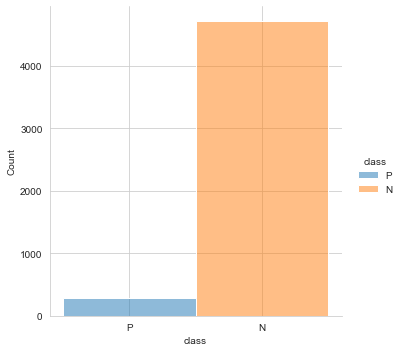

In [15]:
sns.set_style('whitegrid')
sns.displot(data=df_calib_copy, x='class', hue='class')

In [16]:
df_calib_copy['class'].value_counts()

N    4715
P     281
Name: class, dtype: int64

Class is highly imbalanced for almost 1:20

#### Some Preprocessing

In [18]:
df_prep = df_calib.copy()

In [20]:
index_ = df_prep.loc[df_prep.isin([-9999.00]).any(axis=1)]

In [23]:
index_['class'].value_counts()

N    17
Name: class, dtype: int64

In [28]:
df_prep.drop(index_.index, inplace=True)

In [29]:
df_prep.shape

(4979, 29)

In [31]:
df_prep.to_csv('../Data/Cleaned/Calibration.csv', index=False)